Всем привет! 

Это ваше первое домашнее задание))

Списывать нельзя, гуглить можно) 

Что надо помнить: пишите код красиво, контролируйте код-стайл, нормальную структуру, импорты и т. д.

Дедлайн: четверг 5 декабря в 23:59

Решения на почту - skvortsovg@yandex.ru

Пожалуйста, напишите в теме письма так: **ФТиАД24: python_дз1 Фамилия Имя**

In [1]:
import numpy as np

### Задача 1 (расстояние между точками на земле)

Напишите программу, в которой пользователь будет вводить координаты двух точек на Земле (широту и долготу) в градусах. На выходе должно получиться расстояние между этими точками при следовании по кратчайшему пути по поверхности планеты.



In [2]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [3]:
print(f'Distance: {haversine_array(48.572549, 45.761142, 49.840147, 24.014199):.4f}')

Distance: 1580.5381


### Задача 2 (максимальная сумма)

Ввести в столбик последовательность целых (положительных и отрицательных) чисел, не равных нулю; в конце этой последовательности стоит 0. Вывести наибольшую сумму последовательно идущих элементов этой последовательности (не менее одного).



In [4]:
input_history = []

cur_input = int(input('Input a number: '))
input_history.append(cur_input)

cur_sum = cur_input
max_sum = cur_input

while True and cur_input != 0:
    cur_input = int(input('Input a number: '))
    input_history.append(cur_input)

    if cur_input == 0:
        break

    if cur_sum < 0:
        cur_sum = max(0, cur_input)
    else:
        cur_sum = max(0, cur_sum + cur_input)

    if cur_sum > 0:
        max_sum = max(max_sum, cur_sum)
    else:
        max_sum = max(max_sum, cur_input)


print(input_history, max_sum)

[1, 1, 1, 2, 3, 4, 6, -1, 10, 0] 27


### Задача 3 (сумма кубов)

Ввести натуральное число N и вывести, сколько существует различных пар натуральных чисел A и B: A³+B³=N (с точностью до перестановки).  Вещественные операции (например, кубический корень) рекомендуется использовать как можно реже.

In [5]:
N = 54
max_root = int(N ** (1/3))

In [6]:
roots = []
for i in range(max_root, 0, -1):
    for j in range(i + 1):
        if i ** 3 + j ** 3 == N:
            roots.append((i, j))
            print('MEOW')
            break

print(f'Here are {len(roots)} n of root pairs: {roots}')

MEOW
Here are 1 n of root pairs: [(3, 3)]


### Задача 4 (Разложение на множители)
Ввести произвольное натуральное число, не превосходящее 1000000000 

Вывести (через «*») все его разложения на натуральные сомножители, превосходящие 1, без учёта перестановок. Сомножители в каждом разложении и сами разложения (как последовательности) при выводе должны быть упорядочены по возрастанию. Само число также считается разложением.

In [7]:
number = 2*9
prime_dividers = [1]

break_while = True

while break_while:
    for i in range(prime_dividers[-1], number + 1):

        if i == number:
            break_while = False

        if (number % i == 0) & (i != 1):
            prime_dividers.append(i)
            number = number // i
            break

print(prime_dividers)

[1, 2, 3, 3]


In [8]:
def generate_combinations(dividers, index=0, current_combination=[], results=[]):
    if index == len(dividers):
        if current_combination:
            results.append(current_combination[:])
        return

    current_combination.append(dividers[index])
    generate_combinations(dividers, index + 1, current_combination, results)
    current_combination.pop()

    if current_combination:
        current_combination[-1] *= dividers[index]
        generate_combinations(dividers, index + 1, current_combination, results)
        current_combination[-1] //= dividers[index]


In [9]:
def print_combinations(dividers):
    results = []
    generate_combinations(dividers, 0, [], results)
    
    for combination in results:
        print("*".join(map(str, sorted(combination))))

print_combinations(prime_dividers)

1*2*3*3
1*2*9
1*3*6
1*18
2*3*3
2*9
3*6
18


### Задача 5 (Переворот числа)
Пусть на вход дается челое 32-х битное число (может быть и отрицательное)

Необходимо вернуть его перевернутую версию, например, для числа -123 ответом будет -321, а для числа -1 будет -1, а для 10101010 - 1010101

Пользоваться строковыми методами *нельзя*

In [12]:
n = 101010
arr = []

neg = False
if n < 0:
    n *= (-1)
    neg = True

while n // 10 > 0:
    arr.append(n % 10)
    n = n // 10

arr.append(n)

new_num = 0
for i, power in enumerate(range(len(arr) - 1, -1, -1)):
    new_num += arr[i] * 10 ** power

if neg:
    new_num *= (-1)


print(new_num)

10101


### Задача 6 (Перевод числа в римской записи а арабскую):

На вход подается строка, представляющая натуральное число в римской записи (из символов I, V, X, C, L, M). Требуется представить его в арабской записи. Подробнее про арабские числа можно почитать на [википедии](https://ru.wikipedia.org/wiki/%D0%A0%D0%B8%D0%BC%D1%81%D0%BA%D0%B8%D0%B5_%D1%86%D0%B8%D1%84%D1%80%D1%8B)

In [ ]:
roman = {
    'I': 1,
    'V': 5,
    'X': 10,
    'L': 50,
    'C': 100,
    'D': 500,
    'M': 1000
    }

roman_line = 'XVIII'
roman_line = 'CMXLIII'
roman_line = 'DCCCXLIII'

cur_val = 0

for i in range(len(roman_line)):
    if i == len(roman_line) - 1:
        cur_val += roman[roman_line[i]]
    else:
        if roman[roman_line[i]] < roman[roman_line[i + 1]]:
            cur_val -= roman[roman_line[i]]
        else:
            cur_val += roman[roman_line[i]]

print(cur_val)


843


### Задача 7 (Группировка итератора)

Напишите итератор (вспомните про **yield**), которая возвращает строку длины N

Напишите вспомогательную функцию, которая будет принимать результат итератора и комбинировать его в чанки заданной длины


In [10]:
def my_string_generator(N):
    stroke = 'a' * N
    for char in stroke:
        yield char



def chunker(iterable, chunk_size=2) -> tuple:
    while True:
        chunk = []

        for _ in range(chunk_size):
            try:
                chunk.append(next(iterable))
            except:
                yield tuple(chunk)
                return None

        yield tuple(chunk)


N = 10
chunk_size = 3

for chunk in chunker(my_string_generator(N), chunk_size):
    print(chunk)


('a', 'a', 'a')
('a', 'a', 'a')
('a', 'a', 'a')
('a',)


### Задача 8 (Декоратор-ретрай)

Напишите функцию, которая принимает число N и с вероятностью 1/N возвращает строку, а в остальных случаях порождает исключение.

Напишите декоратор, который пытается выполнить функцию заданное кол-во раз и задекорируйте ее.


In [4]:
import random as rnd

In [39]:
def try_execute(n_tries=10):
    def decorator(func):
        def wrapper(*args, **kwargs):
            tries = 0
            while tries < n_tries:
                try:
                    return func(*args, **kwargs)
                except Exception as e:
                    tries += 1
                    print(f'attempt no {tries}. a great time to give up.')

                    if tries == n_tries:
                        print('you failed. no meow allowed.')
                        raise e

        return wrapper
    return decorator

In [40]:
@try_execute(n_tries=10)
def probabilistic_meow(N):
    number = rnd.randint(0, N)
    if number == N // 2:
        return 'MEOW MEOW MEOW'
    else:
        raise

In [41]:
probabilistic_meow(10)

attempt no 1. a great time to give up.
attempt no 2. a great time to give up.
attempt no 3. a great time to give up.
attempt no 4. a great time to give up.
attempt no 5. a great time to give up.
attempt no 6. a great time to give up.
attempt no 7. a great time to give up.
attempt no 8. a great time to give up.


'MEOW MEOW MEOW'

### Задание 9 (Использование паттера Singleton)

Найдите на github примеры кода (5 штук), где применяется паттерн singleton. У репозитория, в которым вы ищите, должно быть более 10 звездочек.

Ниже вставьте примеры такого кода (5 штук) и напишите где именно используется паттерн и зачем

singleton pattern is used to ensure that there is only one instance of class running during app uptime


https://github.com/ets-labs/python-dependency-injector 

singleton here ensures there is only one api client for a session; so that all components that require api client get the same instance of it, which helps in maintaining consistency


https://github.com/lazybird/django-solo

database that holds global settings for siteconfiguration has only one row, which is singleton instanse. it provides easier sharing options of configuration through the application and makes maintainance for admin easier


https://github.com/steinitzu/celery-singleton

it ensures there is only one instance of task that have the same name and arguments running in a system at a time, preventing duplicate tasks executions etc so that keeps resourses

https://github.com/DongjunLee/hb-config

quote: feat(hbconfig-meta): implemets HBConfigMeta (singleton, access all attribute using __getattr__), and SubConfig, add examples in README

basically, no matter how many times Config class is assessed, there is only one instance of HBConfigMeta metaclass (they just check whether the instance already exists)

https://github.com/twtrubiks/line-bot-oop

here, only one instance of Config class is initialized, so there is one configuration for application


### Задача 10 (Решатель судоку)

Напишите программу, которая принимает матричку 9*9 (список списков), которая представляет собой кроссворд-судоку.
В местах, куда надо вставить значения - -**1**

И напишите функцию (функции), которые решают судоку и выводят результат

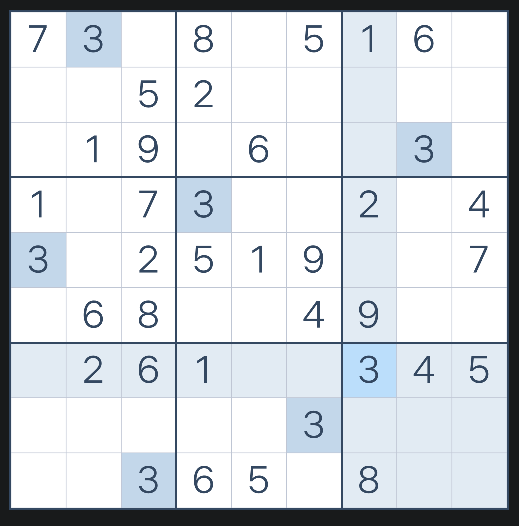

In [20]:
from pprint import pprint
import numpy as np

In [187]:
def is_possible(y, x, n, grid): 

    '''
    Function that checks whether the number (n) can be inserted into row (y), column (x).
    ----------------->   x
    |
    |
    |
    |
    |
    v 
     
    Y
    '''

    # check if n can be inserted into y-th row 
    for i in range(0, 9):
        if grid[y][i] == n: 
            # print(f'{y} row check failed')
            return False

    # check if n can be inserted into x-th column 
    for i in range(0, 9):
        if grid[i][x] == n: 
            # print(f'{x} column check failed')
            return False

    # check if n can be inserted into corresponding square
    x0 = (x // 3) * 3 # start column of square
    y0 = (y // 3) * 3 # start row of square
    for i in range(0, 3):
        for j in range(0, 3):
            if grid[y0 + i][x0 + j] == n:
                # print(f'{y0}, {x0} square check failed')
                return False 

    # print('No checks failed, possible insert!')        
    return True


In [188]:
def solve(grid):
    
    for j in range(9):
        for i in range(9):
            if grid[j][i] == -1:
                for n in range(1,10):
                    if is_possible(j, i, n, grid):
                        grid[j][i] = n
                        solve(grid) 
                        grid[j][i] = -1
                return
    # сюда можно попасть только когда пустых ячеек не осталось, т.е. печатаем решение
    print(np.matrix(grid))
    return
    

In [189]:
grid = [
    [7, 3, -1, 8, -1, 5, 1, 6, -1], 
    [-1, -1, 5, 2, -1, -1, -1, -1, -1], 
    [-1, 1, 9, -1, 6, -1, -1, 3, -1], 
    [1, -1, 7, 3, -1, -1, 2, -1, 4], 
    [3, -1, 2, 5, 1, 9, -1, -1, 7], 
    [-1, 6, 8, -1, -1, 4, 9, -1, -1], 
    [-1, 2, 6, 1, -1, -1, 3, 4, 5], 
    [-1, -1, -1, -1, -1, 3, -1, -1, -1], 
    [-1, -1, 3, 6, 5, -1, 8, -1, -1]
    ]

print(np.matrix(grid))

solve(grid)


[[ 7  3 -1  8 -1  5  1  6 -1]
 [-1 -1  5  2 -1 -1 -1 -1 -1]
 [-1  1  9 -1  6 -1 -1  3 -1]
 [ 1 -1  7  3 -1 -1  2 -1  4]
 [ 3 -1  2  5  1  9 -1 -1  7]
 [-1  6  8 -1 -1  4  9 -1 -1]
 [-1  2  6  1 -1 -1  3  4  5]
 [-1 -1 -1 -1 -1  3 -1 -1 -1]
 [-1 -1  3  6  5 -1  8 -1 -1]]
[[7 3 4 8 9 5 1 6 2]
 [6 8 5 2 3 1 4 7 9]
 [2 1 9 4 6 7 5 3 8]
 [1 9 7 3 8 6 2 5 4]
 [3 4 2 5 1 9 6 8 7]
 [5 6 8 7 2 4 9 1 3]
 [9 2 6 1 7 8 3 4 5]
 [8 5 1 9 4 3 7 2 6]
 [4 7 3 6 5 2 8 9 1]]


### Задача 11 (сколько гостей было в отеле одномоментно)
Представьте, что вы - менеджер отеля и хотите знать, сколько гостей было в отеле максимально за весь период.

Каждый гость характеризуется тюплом (day_start, day_end), который показывает, когда гость заселился и выселился из отеля. Имейте в виду, что время заселения всегда больше, чем время выселения, то есть гости (1, 6) и (6, 8) не пересекались друг с другом.

Напишите функцию, которая позволяет определить, сколько гостей в отеле было максимально. Входные данные вышей функции - список из тюплов.

Примеры: 

    1. [(0, 1), (1, 2), (0, 3)] -> 2
    2. [(10, 20), (5, 7), (5, 20), (20, 21)] -> 2
    3. [(10, 20), (5, 7), (5, 20), (20, 21), (3, 7)] -> 3

In [48]:
base = [(0, 1), (1, 2), (0, 3)]
base = [(10, 20), (5, 7), (5, 20), (20, 21)]
base = [(10, 20), (5, 7), (5, 20), (20, 21), (3, 7)]

events = []

for event in base:
    events.append((event[0], 1))
    events.append((event[1], -1))

events = sorted(events)

max_count = 0
count = 0
for event in events:
    count += event[1]
    if count > max_count:
        max_count = count

print(max_count)


3


### Задача 12 (проверка на центр отрезка)

Пусть у вас есть 3 числа - первые два задают начало и конец отрезка, а третье - предполагаемую середину. Все вводные значения - float

Необходимо написать функцию, которая проверяет, является ли третье число серединой отрезка.


In [33]:
def get_n_digits(number):
    digits = str(number).split('.')[1]
    if digits == '0':
        return 0
    else:
        return len(digits)

In [ ]:
def get_mid(a: float, b: float, mid: float):
    a_power, b_power, mid_power = get_n_digits(a), get_n_digits(b), get_n_digits(mid)
    power = max(a_power, b_power, mid_power)
    a, b, mid = int(a * 10 ** power), int(b * 10 ** power), int(mid * 10 ** power)
    
    if (a + b) / 2 == mid:
        print('MEOW')
    else:
        print('now meow =(')

In [37]:
get_mid(0.1, 0.2, 0.15)

MEOW


### Задача 13 (классы)

Это задача дает большой простор для креатива. Вам надо написать класс (или классы), где вы продемонстрируйте владение такими штуками, как проперти, классметод, статикметод, магические методы (достаточно показать владение несколькими из них).

In [192]:
import random as rnd

In [193]:
class NyanCat():

    def __init__(self, breed, colour, n_tails, language='catinese'):
        self.breed = breed
        self._colour = colour
        self.n_tails = n_tails
        self.language = language

    @property
    def is_colour_possible(self):
        return self._colour
    
    @is_colour_possible.setter
    def is_colour_possible(self, colour):
        if colour not in ['grey', 'orange', 'white', 'black', 'brown', 'silver', 'golden']:
            raise ValueError(f'a cat cant be {colour}.')
        self._colour = colour

    @staticmethod
    def get_meow(number: int):
        if number == rnd.randint(number // 10, number):
            print('you are blessed with meow today!🐱✨')
        else:
            print('unluck! try getting meow later.😿')

    @classmethod
    def lucky_cat(cls):
        lucky_breeds = ['scotch', 'birman', 'russian blue']
        lucky_colours = ['white', 'silver', 'golden']
        lucky_tails = [7, 9, 19]
        return cls(
            breed=rnd.choice(lucky_breeds),
            colour=rnd.choice(lucky_colours),
            n_tails=rnd.choice(lucky_tails),
            language='facts'
        )
    
    def __eq__(self, other):
        return (self.breed == other.breed) & (self._colour == other._colour) & (self.n_tails == other.n_tails)
    
    def __str__(self):
        luckiness = 'extremely lucky!' if self.n_tails in([7, 9, 19]) \
            else 'DIVINE' if self.n_tails in([3, 42]) \
            else 'a bit lucky' if self.n_tails in([8, 12]) \
            else 'chaotic evil' if self.n_tails in([4, 13]) \
            else 'a neutral cat'
        return f'this NyanCat is {self.breed} of {self._colour} colour with {self.n_tails} tails. it is {luckiness}'
    
    def translate_to_meownese(self, text: str):
        words = text.split()

        if self.language == 'elven':
            meows = ['meowdy', 'mewl', 'mewow', 'miaouw', 'myae', 'smyuen', 'myaa', 'aiya']
        elif self.language == 'fact':
            meows = ['MEOWGGR', 'MIGGER', 'MIGGA', 'miyagi', 'meowck', 'there are only two genders.']
        else:
            meows = ['meow', 'mew', 'nyan', 'purr', 'miau']
        
        return ' '.join([rnd.choice(meows) for _ in words])


In [194]:
nyan = NyanCat('russian blue', 'silver', 9, 'fact')
lucky_nyan = NyanCat.lucky_cat()

print(nyan._colour)
nyan.is_colour_possible = 'brown'
print(nyan._colour)
nyan.is_colour_possible = 'green'

silver
brown


ValueError: a cat cant be green.

In [195]:
text = 'hello my little nyancat! how are you today! have you slept well?'

In [196]:
print(nyan.translate_to_meownese(text))

print(nyan)
print(lucky_nyan)

print(nyan == lucky_nyan)

meowck MEOWGGR MIGGA miyagi MIGGER miyagi MIGGER MIGGA MIGGA MEOWGGR there are only two genders. there are only two genders.
this NyanCat is russian blue of brown colour with 9 tails. it is extremely lucky!
this NyanCat is scotch of white colour with 19 tails. it is extremely lucky!
False


In [197]:
nyan.get_meow(10)

unluck! try getting meow later.😿
